In [1]:
import re
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribuƟon (excluding stopwords)

In [2]:
paragraph = """ Investing is a strategic approach to growing wealth by allocating funds to assets like stocks, bonds, mutual funds, or real estate. It requires careful analysis of market trends, risk tolerance, and financial goals. Successful investors diversify portfolios, balancing risks and rewards for long-term growth. Patience and discipline are essential, as markets fluctuate over time. Whether through active trading or passive investing, understanding economic indicators and company performance is crucial. The power of compounding helps money grow exponentially, making early investments advantageous. With informed decisions and proper planning, investing can secure financial stability and future prosperity, adapting to evolving market conditions"""

In [3]:
lower = paragraph.lower()
clean = re.sub(r'[^\w\s]', '', lower)
print(clean)

 investing is a strategic approach to growing wealth by allocating funds to assets like stocks bonds mutual funds or real estate it requires careful analysis of market trends risk tolerance and financial goals successful investors diversify portfolios balancing risks and rewards for longterm growth patience and discipline are essential as markets fluctuate over time whether through active trading or passive investing understanding economic indicators and company performance is crucial the power of compounding helps money grow exponentially making early investments advantageous with informed decisions and proper planning investing can secure financial stability and future prosperity adapting to evolving market conditions


In [4]:
sentence = sent_tokenize(paragraph)
print("Sentences:", sentence)

word = word_tokenize(clean)
print("Words:", word)

Sentences: [' Investing is a strategic approach to growing wealth by allocating funds to assets like stocks, bonds, mutual funds, or real estate.', 'It requires careful analysis of market trends, risk tolerance, and financial goals.', 'Successful investors diversify portfolios, balancing risks and rewards for long-term growth.', 'Patience and discipline are essential, as markets fluctuate over time.', 'Whether through active trading or passive investing, understanding economic indicators and company performance is crucial.', 'The power of compounding helps money grow exponentially, making early investments advantageous.', 'With informed decisions and proper planning, investing can secure financial stability and future prosperity, adapting to evolving market conditions']
Words: ['investing', 'is', 'a', 'strategic', 'approach', 'to', 'growing', 'wealth', 'by', 'allocating', 'funds', 'to', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'or', 'real', 'estate', 'it', 'requires', 'c

In [5]:
splitwords = clean.split()
print("Split words:", splitwords)
tokenwords = word_tokenize(clean)
print("Tokenized words:", tokenwords)

Split words: ['investing', 'is', 'a', 'strategic', 'approach', 'to', 'growing', 'wealth', 'by', 'allocating', 'funds', 'to', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'or', 'real', 'estate', 'it', 'requires', 'careful', 'analysis', 'of', 'market', 'trends', 'risk', 'tolerance', 'and', 'financial', 'goals', 'successful', 'investors', 'diversify', 'portfolios', 'balancing', 'risks', 'and', 'rewards', 'for', 'longterm', 'growth', 'patience', 'and', 'discipline', 'are', 'essential', 'as', 'markets', 'fluctuate', 'over', 'time', 'whether', 'through', 'active', 'trading', 'or', 'passive', 'investing', 'understanding', 'economic', 'indicators', 'and', 'company', 'performance', 'is', 'crucial', 'the', 'power', 'of', 'compounding', 'helps', 'money', 'grow', 'exponentially', 'making', 'early', 'investments', 'advantageous', 'with', 'informed', 'decisions', 'and', 'proper', 'planning', 'investing', 'can', 'secure', 'financial', 'stability', 'and', 'future', 'prosperity', 'adapting',

In [6]:
stop_words = set(stopwords.words('english'))
filtered = [word for word in tokenwords if word not in stop_words]
print("Filtered Words:", filtered)

Filtered Words: ['investing', 'strategic', 'approach', 'growing', 'wealth', 'allocating', 'funds', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'real', 'estate', 'requires', 'careful', 'analysis', 'market', 'trends', 'risk', 'tolerance', 'financial', 'goals', 'successful', 'investors', 'diversify', 'portfolios', 'balancing', 'risks', 'rewards', 'longterm', 'growth', 'patience', 'discipline', 'essential', 'markets', 'fluctuate', 'time', 'whether', 'active', 'trading', 'passive', 'investing', 'understanding', 'economic', 'indicators', 'company', 'performance', 'crucial', 'power', 'compounding', 'helps', 'money', 'grow', 'exponentially', 'making', 'early', 'investments', 'advantageous', 'informed', 'decisions', 'proper', 'planning', 'investing', 'secure', 'financial', 'stability', 'future', 'prosperity', 'adapting', 'evolving', 'market', 'conditions']


<Axes: title={'center': 'Word Frequency (without Stopwords)'}, xlabel='Samples', ylabel='Counts'>

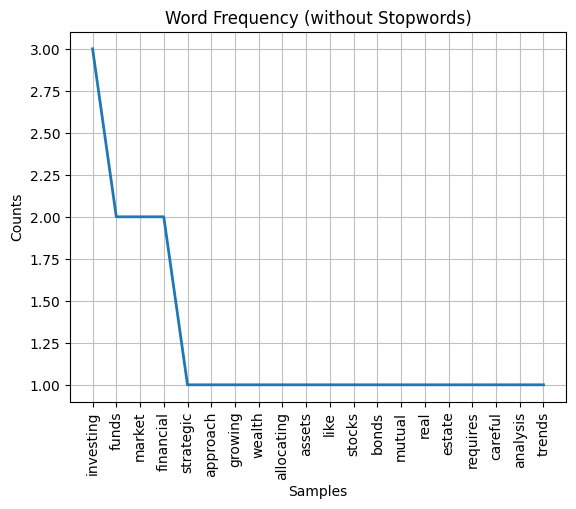

In [7]:
fdist = FreqDist(filtered)
fdist.plot(20, title="Word Frequency (without Stopwords)")

Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmaƟzaƟon with WordNetLemmaƟzer
5. Compare the stemmed and lemmaƟzed outputs and explain when you’d prefer one over
the other.

In [8]:
lower = paragraph.lower()
alphabeticwords = re.findall(r'\b[a-zA-Z]+\b',lower)
print("Alphabetic Words:", alphabeticwords)

Alphabetic Words: ['investing', 'is', 'a', 'strategic', 'approach', 'to', 'growing', 'wealth', 'by', 'allocating', 'funds', 'to', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'or', 'real', 'estate', 'it', 'requires', 'careful', 'analysis', 'of', 'market', 'trends', 'risk', 'tolerance', 'and', 'financial', 'goals', 'successful', 'investors', 'diversify', 'portfolios', 'balancing', 'risks', 'and', 'rewards', 'for', 'long', 'term', 'growth', 'patience', 'and', 'discipline', 'are', 'essential', 'as', 'markets', 'fluctuate', 'over', 'time', 'whether', 'through', 'active', 'trading', 'or', 'passive', 'investing', 'understanding', 'economic', 'indicators', 'and', 'company', 'performance', 'is', 'crucial', 'the', 'power', 'of', 'compounding', 'helps', 'money', 'grow', 'exponentially', 'making', 'early', 'investments', 'advantageous', 'with', 'informed', 'decisions', 'and', 'proper', 'planning', 'investing', 'can', 'secure', 'financial', 'stability', 'and', 'future', 'prosperity', 'a

In [10]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alphabeticwords if word not in stop_words]
print("Filtered Words:", filtered_words)

Filtered Words: ['investing', 'strategic', 'approach', 'growing', 'wealth', 'allocating', 'funds', 'assets', 'like', 'stocks', 'bonds', 'mutual', 'funds', 'real', 'estate', 'requires', 'careful', 'analysis', 'market', 'trends', 'risk', 'tolerance', 'financial', 'goals', 'successful', 'investors', 'diversify', 'portfolios', 'balancing', 'risks', 'rewards', 'long', 'term', 'growth', 'patience', 'discipline', 'essential', 'markets', 'fluctuate', 'time', 'whether', 'active', 'trading', 'passive', 'investing', 'understanding', 'economic', 'indicators', 'company', 'performance', 'crucial', 'power', 'compounding', 'helps', 'money', 'grow', 'exponentially', 'making', 'early', 'investments', 'advantageous', 'informed', 'decisions', 'proper', 'planning', 'investing', 'secure', 'financial', 'stability', 'future', 'prosperity', 'adapting', 'evolving', 'market', 'conditions']


In [12]:
porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['invest', 'strateg', 'approach', 'grow', 'wealth', 'alloc', 'fund', 'asset', 'like', 'stock', 'bond', 'mutual', 'fund', 'real', 'estat', 'requir', 'care', 'analysi', 'market', 'trend', 'risk', 'toler', 'financi', 'goal', 'success', 'investor', 'diversifi', 'portfolio', 'balanc', 'risk', 'reward', 'long', 'term', 'growth', 'patienc', 'disciplin', 'essenti', 'market', 'fluctuat', 'time', 'whether', 'activ', 'trade', 'passiv', 'invest', 'understand', 'econom', 'indic', 'compani', 'perform', 'crucial', 'power', 'compound', 'help', 'money', 'grow', 'exponenti', 'make', 'earli', 'invest', 'advantag', 'inform', 'decis', 'proper', 'plan', 'invest', 'secur', 'financi', 'stabil', 'futur', 'prosper', 'adapt', 'evolv', 'market', 'condit']


In [14]:
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['investing', 'strategic', 'approach', 'growing', 'wealth', 'allocating', 'fund', 'asset', 'like', 'stock', 'bond', 'mutual', 'fund', 'real', 'estate', 'requires', 'careful', 'analysis', 'market', 'trend', 'risk', 'tolerance', 'financial', 'goal', 'successful', 'investor', 'diversify', 'portfolio', 'balancing', 'risk', 'reward', 'long', 'term', 'growth', 'patience', 'discipline', 'essential', 'market', 'fluctuate', 'time', 'whether', 'active', 'trading', 'passive', 'investing', 'understanding', 'economic', 'indicator', 'company', 'performance', 'crucial', 'power', 'compounding', 'help', 'money', 'grow', 'exponentially', 'making', 'early', 'investment', 'advantageous', 'informed', 'decision', 'proper', 'planning', 'investing', 'secure', 'financial', 'stability', 'future', 'prosperity', 'adapting', 'evolving', 'market', 'condition']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.

In [15]:
texts = [
    "Investing is about putting money to work in ways that generate returns, whether through stocks, real estate, or other assets.",
    "Patience and research are key—markets fluctuate, but long-term strategies often lead to success.",
    "Diversification helps manage risk, ensuring that a single downturn doesn't wipe out your entire portfolio."
]

In [16]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(texts)
print("Vocabulary:", count_vectorizer.get_feature_names_out())
print("Bag of Words Matrix:\n", count_matrix.toarray())

Vocabulary: ['about' 'and' 'are' 'assets' 'but' 'diversification' 'doesn' 'downturn'
 'ensuring' 'entire' 'estate' 'fluctuate' 'generate' 'helps' 'in'
 'investing' 'is' 'key' 'lead' 'long' 'manage' 'markets' 'money' 'often'
 'or' 'other' 'out' 'patience' 'portfolio' 'putting' 'real' 'research'
 'returns' 'risk' 'single' 'stocks' 'strategies' 'success' 'term' 'that'
 'through' 'to' 'ways' 'whether' 'wipe' 'work' 'your']
Bag of Words Matrix:
 [[1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1
  0 0 0 1 1 1 1 1 0 1 0]
 [0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0
  1 1 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0
  0 0 0 1 0 0 0 0 1 0 1]]


In [17]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()
print("TF-IDF Matrix:\n", tfidf_matrix.toarray())

TF-IDF Matrix:
 [[0.22847492 0.         0.         0.22847492 0.         0.
  0.         0.         0.         0.         0.22847492 0.
  0.22847492 0.         0.22847492 0.22847492 0.22847492 0.
  0.         0.         0.         0.         0.22847492 0.
  0.22847492 0.22847492 0.         0.         0.         0.22847492
  0.22847492 0.         0.22847492 0.         0.         0.22847492
  0.         0.         0.         0.17376106 0.22847492 0.17376106
  0.22847492 0.22847492 0.         0.22847492 0.        ]
 [0.         0.26190578 0.26190578 0.         0.26190578 0.
  0.         0.         0.         0.         0.         0.26190578
  0.         0.         0.         0.         0.         0.26190578
  0.26190578 0.26190578 0.         0.26190578 0.         0.26190578
  0.         0.         0.         0.26190578 0.         0.
  0.         0.26190578 0.         0.         0.         0.
  0.26190578 0.26190578 0.26190578 0.         0.         0.19918609
  0.         0.         0.    

In [19]:
for i in range(len(texts)):
    print(f"\nText {i+1}: {texts[i]}")
    row = tfidf_matrix[i].toarray()[0]
    top_indices = row.argsort()[-3:][::-1]
    for idx in top_indices:
        print(f"   {feature_names[idx]} (Score: {row[idx]:.5f})")


Text 1: Investing is about putting money to work in ways that generate returns, whether through stocks, real estate, or other assets.
   work (Score: 0.22847)
   ways (Score: 0.22847)
   whether (Score: 0.22847)

Text 2: Patience and research are key—markets fluctuate, but long-term strategies often lead to success.
   strategies (Score: 0.26191)
   success (Score: 0.26191)
   term (Score: 0.26191)

Text 3: Diversification helps manage risk, ensuring that a single downturn doesn't wipe out your entire portfolio.
   your (Score: 0.27138)
   wipe (Score: 0.27138)
   risk (Score: 0.27138)


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives beƩer insights in your case

In [20]:
text1 = """AI mimics human intelligence to process information, solve problems, and learn from data. It powers everything from smart assistants to self-driving cars, making decisions faster than humans. By analyzing patterns, AI improves efficiency in industries like healthcare, finance, and entertainment"""
text2 = """Blockchain is a decentralized and secure digital ledger that records transactions across multiple computers. Best known for powering cryptocurrencies, it ensures transparency and prevents fraud. Its applications go beyond finance, influencing areas like supply chain management and secure voting systems."""

In [21]:
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return tokens

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

print("Tokens 1:", tokens1)
print("Tokens 2:", tokens2)

Tokens 1: ['ai', 'mimics', 'human', 'intelligence', 'process', 'information', 'solve', 'problems', 'learn', 'data', 'powers', 'everything', 'smart', 'assistants', 'selfdriving', 'cars', 'making', 'decisions', 'faster', 'humans', 'analyzing', 'patterns', 'ai', 'improves', 'efficiency', 'industries', 'like', 'healthcare', 'finance', 'entertainment']
Tokens 2: ['blockchain', 'decentralized', 'secure', 'digital', 'ledger', 'records', 'transactions', 'across', 'multiple', 'computers', 'best', 'known', 'powering', 'cryptocurrencies', 'ensures', 'transparency', 'prevents', 'fraud', 'applications', 'go', 'beyond', 'finance', 'influencing', 'areas', 'like', 'supply', 'chain', 'management', 'secure', 'voting', 'systems']


In [22]:
set1 = set(tokens1)
set2 = set(tokens2)

jaccard_sim = len(set1 & set2) / len(set1 | set2)
print("Jaccard Similarity:", round(jaccard_sim, 3))

Jaccard Similarity: 0.035


In [23]:
corpus = [text1, text2]
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(corpus)

cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])
print("Cosine Similarity:", round(cos_sim[0][0], 3))

Cosine Similarity: 0.034


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjecƟvity for each review.
2. Classify reviews into PosiƟve / NegaƟve / Neutral.
3. Create a word cloud using the wordcloud library for all posiƟve reviews.

In [24]:
review = """The Samsung Galaxy S21 FE is a well-balanced smartphone that brings flagship-like features at a more affordable price. It offers a smooth user experience, a bright and vibrant display, and a capable camera setup for everyday photography. The phone's sleek design and water resistance add to its appeal, making it a solid choice for those who want a premium feel without the high cost. However, its battery life and charging speed could be better, and its pricing may not always justify the upgrades over previous models. Overall, it's a reliable option for Samsung fans looking for a mix of performance and affordability."""

In [25]:
blob = TextBlob(review)
polarity = blob.sentiment.polarity
subjectivity = blob.sentiment.subjectivity

print(f"Polarity: {polarity}")
print(f"Subjectivity: {subjectivity}")

Polarity: 0.19666666666666668
Subjectivity: 0.37000000000000005


In [26]:
if polarity > 0:
    sentiment = "Positive"
elif polarity < 0:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print("Sentiment:", sentiment)

Sentiment: Positive


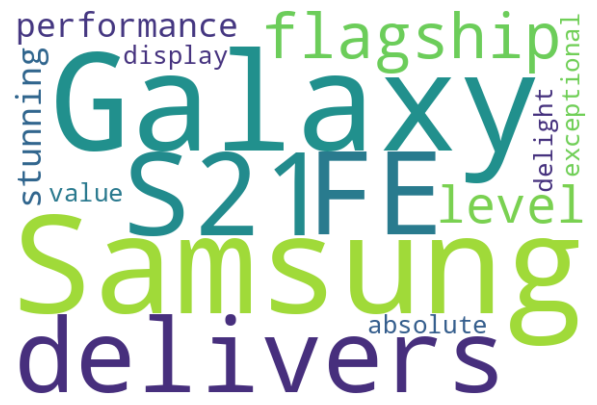

In [27]:
positive_reviews = """The Samsung Galaxy S21 FE delivers flagship-level performance, stunning display, and exceptional value—an absolute delight!"""
wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starƟng from any seed word you provide

In [28]:
paragraph = """ Investing is a strategic approach to growing wealth by allocating funds to assets like stocks, bonds, mutual funds, or real estate. It requires careful analysis of market trends, risk tolerance, and financial goals. Successful investors diversify portfolios, balancing risks and rewards for long-term growth. Patience and discipline are essential, as markets fluctuate over time. Whether through active trading or passive investing, understanding economic indicators and company performance is crucial. The power of compounding helps money grow exponentially, making early investments advantageous. With informed decisions and proper planning, investing can secure financial stability and future prosperity, adapting to evolving market conditions"""
tokenizer = Tokenizer()
tokenizer.fit_on_texts([paragraph])
sequences = []
total_words = len(tokenizer.word_index) + 1

for line in paragraph.split('.'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        sequences.append(n_gram_sequence)
max_sequence_len = max([len(seq) for seq in sequences])
sequences = pad_sequences(sequences, maxlen=max_sequence_len, padding='pre')

X = sequences[:, :-1]
y = sequences[:, -1]
y = np.array(y)

In [30]:

model = Sequential()
model.add(Embedding(total_words, 10))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8868 - loss: 0.9719
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8985 - loss: 0.8590
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.8818 - loss: 0.9557
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8868 - loss: 0.8765
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.9117 - loss: 0.8506
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.9038 - loss: 0.8173
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.8935 - loss: 0.8816
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.8907 - loss: 0.8464
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.8634 - loss: 0.9031
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8999 - loss: 0.8863 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9092 - loss: 0.8413
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9170 - l

In [36]:
seed_text = "diversify portfolio"
next_words = 5

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted_word_index = np.argmax(predicted)

    output_word = ''
    for word, index in tokenizer.word_index.items():
        if index == predicted_word_index:
            output_word = word
            break
    seed_text += " " + output_word

print(seed_text)

diversify portfolio investors diversify portfolios balancing risks
